In [ ]:
# install Tellurium if required
!pip3 install tellurium

In [ ]:
# import required packages
import os
import tellurium as te
import phrasedml

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
workingDir = '/content/drive/My Drive/Woche 4/Erstellung SED-ML/Tellurium/experiment/'
os.chdir(workingDir)

/content/drive/.shortcut-targets-by-id/1hoPux6NZIJrjX2bbdpCc8UYgcarKrPr7/Woche 4/Erstellung SED-ML/Tellurium/experiment


In [ ]:
# retrieve SBML model from model folder and set as reference for phraSEDML
sbml = "../model/Bachmann2011.xml"
ant_str = te.sbmlToAntimony(sbml)
sbml_str = te.antimonyToSBML(ant_str)
phrasedml.setReferencedSBML('../model/Bachmann2011.xml', sbml_str)
# print(sbml_str)

True

In [ ]:
# create phraSEDML string as template for SED-ML
phrasedml_str = """
    model1 = model "{}"
    sim1 = simulate uniform(0, 250, 1000)
    task1 = run sim1 on model1

    # Supplementary Figure 9

    plot "EpoRJAK2" task1.time vs task1.EpoRJAK2
    plot "EpoRpJAK2" task1.time vs task1.EpoRpJAK2
    plot "p1EpoRpJAK2" task1.time vs task1.p1EpoRpJAK2
    plot "p2EpoRpJAK2"task1.time vs task1.p2EpoRpJAK2
    plot "p12EpoRpJAK2"task1.time vs task1.p12EpoRpJAK2
    plot "SHP1" task1.time vs task1.SHP1
    plot "SHP1Act" task1.time vs task1.SHP1Act
    plot "STAT5" task1.time vs task1.STAT5
    plot "pSTAT5" task1.time vs task1.pSTAT5
    plot "npSTAT5" task1.time vs task1.npSTAT5
    plot "CISRNA" task1.time vs task1.CISRNA
    plot "CIS" task1.time vs task1.CIS
    plot "SOCS3RNA" task1.time vs task1.SOCS3RNA
    plot "SOCS3" task1.time vs task1.SOCS3
    

""".format('../model/Bachmann2011.xml')

In [ ]:
# convert to SED-ML and create SED-ML file in working directory
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    raise RuntimeError(phrasedml.getLastError())
#print(sedml_str)

with open(os.path.join(workingDir, 'SuppFig9.sedml'), 'wb') as f:
    f.write(sedml_str.encode('utf-8'))


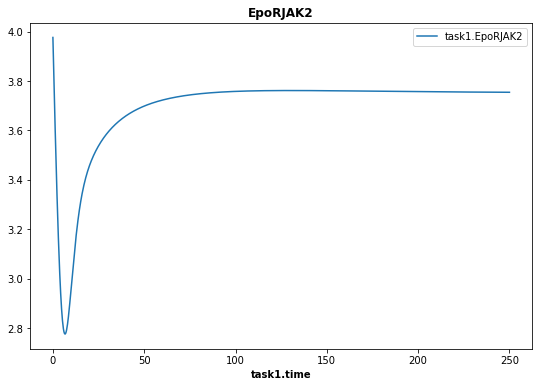

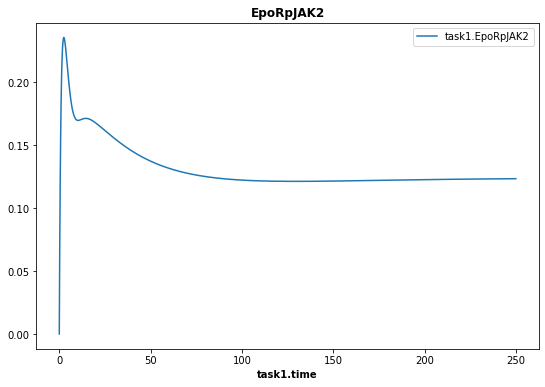

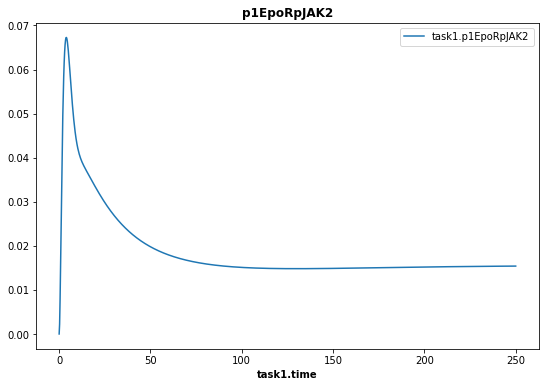

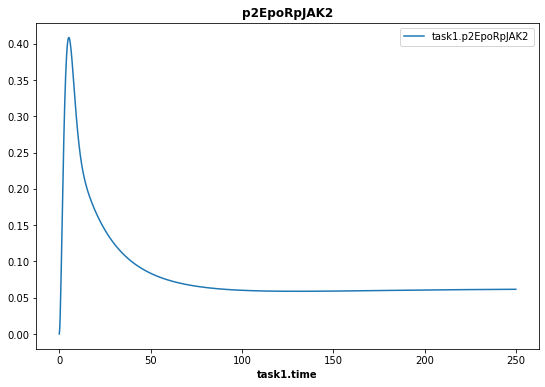

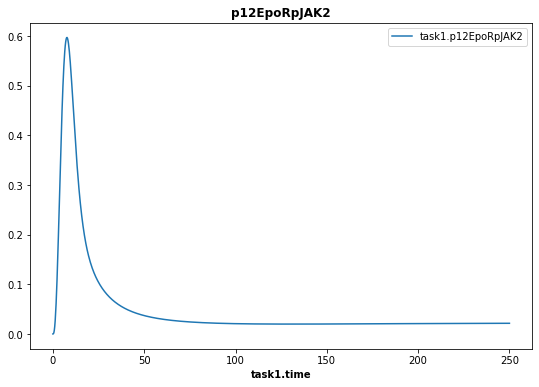

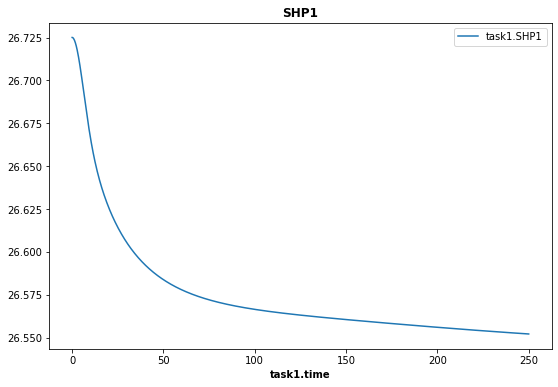

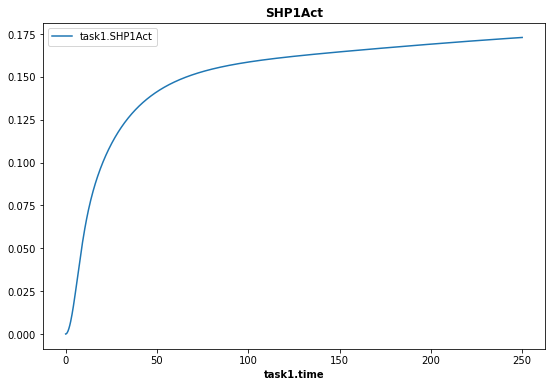

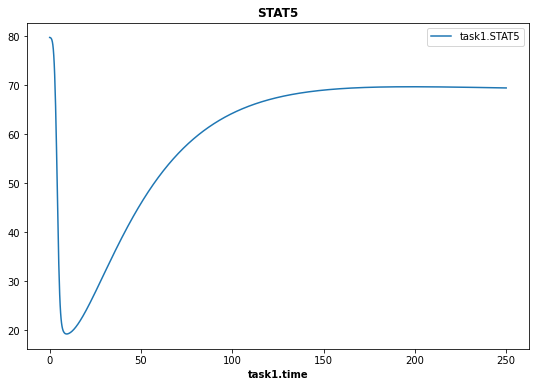

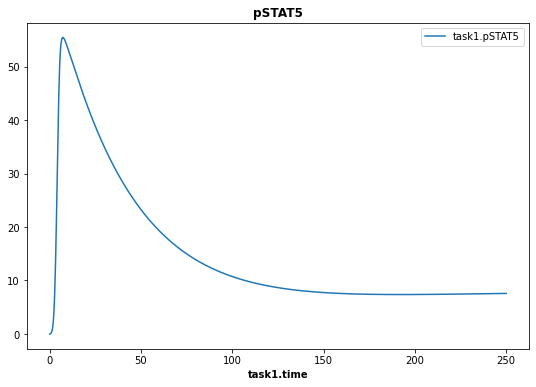

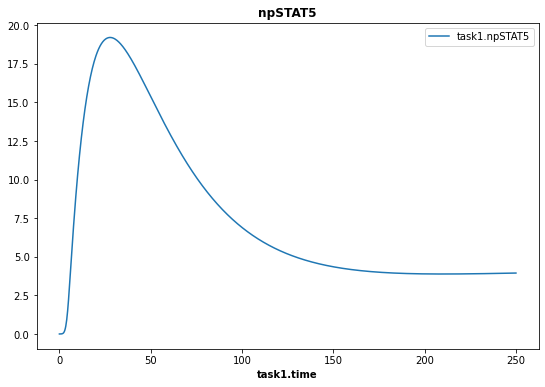

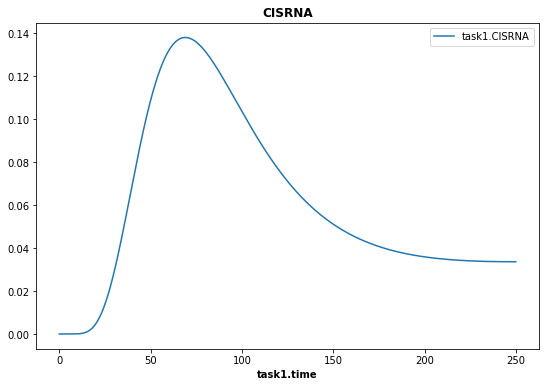

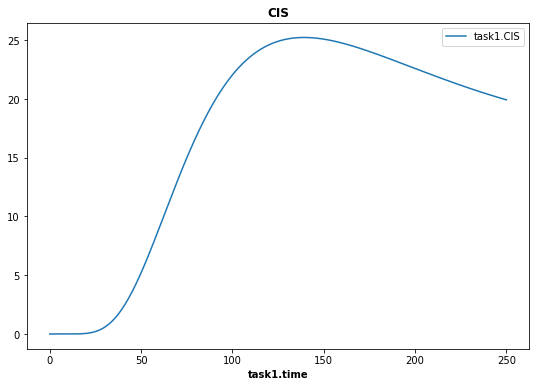

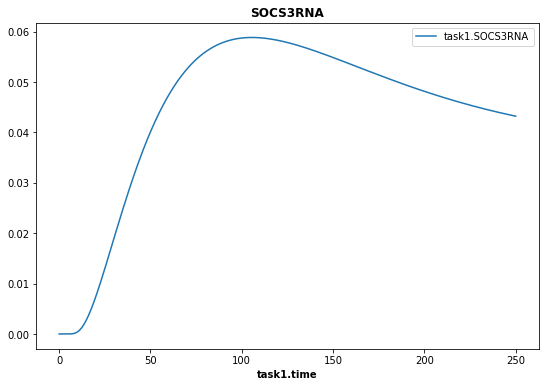

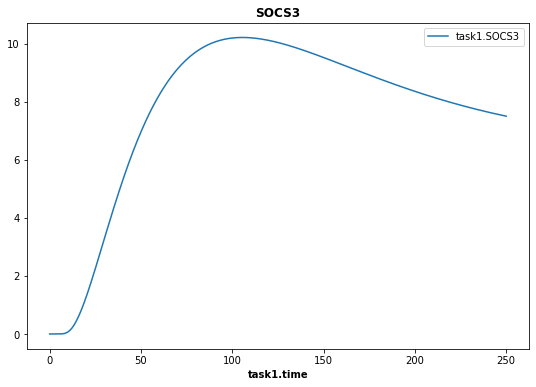

In [ ]:
# run the SED-ML files based on the referenced SBML file in ../models/ 
te.executeSEDML(sedml_str)